<a href="https://colab.research.google.com/github/ivinitus/Cashflow-forecasting/blob/main/COLAB/Random_forrest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random Forest MAE: 20.15
Random Forest MSE: 679.87
Random Forest R-squared: -0.05
     Actual Cash Flow  Predicted Cash Flow (Random Forest)
521          4.642522                             9.239331
737        -23.811609                            -4.501213
740          5.661871                            -4.043727
660        -24.201522                             1.165261
411         17.319680                            -3.818181


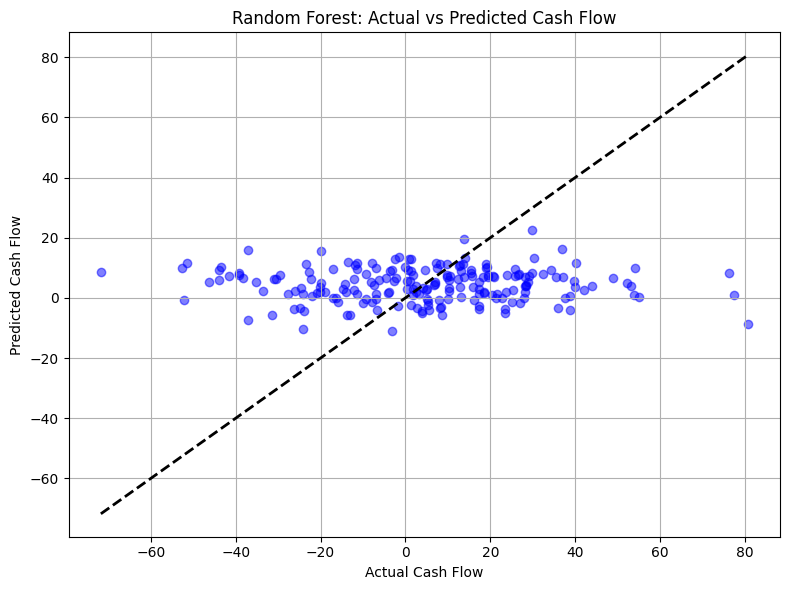

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.read_csv('/content/cash_flow_data_ final.csv')

features = ['Revenue/Sales', 'Total Income', 'Tax', 'Net Profit', 'Accounts Receivable',
            'Accounts Payable', 'Total Expenditure', 'Interest', 'GDP Growth',
            'Inflation/Interest Rate', 'Expenses', 'Cap. Expenditure', 'Seasonality',
            'Client Payment Trends', 'EBIT']
target = 'Cash Flow'

X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest MAE: {mae_rf:.2f}')
print(f'Random Forest MSE: {mse_rf:.2f}')
print(f'Random Forest R-squared: {r2_rf:.2f}')

results_rf = pd.DataFrame({
    'Actual Cash Flow': y_test,
    'Predicted Cash Flow (Random Forest)': y_pred_rf
})

print(results_rf.head())


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Cash Flow')
plt.ylabel('Predicted Cash Flow')
plt.title('Random Forest: Actual vs Predicted Cash Flow')
plt.grid(True)
plt.tight_layout()
plt.show()
